# Laboratório 9

## Bounded Case

Now, I will examine the following model

$$\begin{equation}
    \max_u \int_0^1 Ax(t) - u(t)^2 dt \\
    s.a ~ x'(t) = -\frac{1}{2}x(t)^2 + Cu(t), x(0) = x_0 > -2, \\
    M_1 \leq u(t) \leq M_2, A \geq 0
\end{equation}$$

To solve this problem, we have to think about the necessary conditions. Note that $f$ and $g$ are concaves in $x$ and $u$. If we prove $\lambda(t) \geq 0$, it exists $u^*(t)$. 

$H(t,x,u,\lambda) = Ax(t) - u(t)^2 - \frac{1}{2}\lambda(t)x(t)^2 + C\lambda(t)u(t)$

$\frac{\partial H}{\partial x} = A - \lambda(t)x(t) = -\lambda'(t) \implies \lambda'(t) = \lambda(t)x(t) - A, \lambda(1) = 0 $

$\frac{\partial H}{\partial u} = -2u(t) + C\lambda(t)$

$\frac{\partial H}{\partial u} < 0 ~at~ t \implies u(t) = M_1 \implies M_1 > \frac{C\lambda(t)}{2} \\
\frac{\partial H}{\partial u} = 0 ~at~ t \implies u(t) = \frac{C\lambda(t)}{2} \implies M_1 \leq \frac{C\lambda(t)}{2} \leq M_2 \\
\frac{\partial H}{\partial u} > 0 ~at~ t \implies u(t) = M_2 \implies M_2 < \frac{C\lambda(t)}{2}
$ 

$u^*(t) = \min(M_2,\max (M_1, \frac{C\lambda(t)}{2}))$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class boundedCase():
    
    def __init__(self,A,C,M1,M2,x0):
        self.A = A
        self.C = C
        self.M1 = M1
        self.M2 = M2
        self.x0 = x0
        
    def u(self,t,x,adj):
        a =  max(self.M1,self.C*adj/2)
        return min(self.M2,a)
    
    def dx(self,t,x,adj):
        return -1/2*x**2 + self.C*self.u(t,x,adj)
    
    def dadj(self,t,x,adj):
        return adj*x - self.A
    
    def runge_kutta_state(self,t,x,adj,N,h):

        for k in range(N):
            k1 = self.dx(t[k],x[k],adj[k])
            k2 = self.dx(t[k]+h/2,x[k] + h*k1/2,adj[k])
            k3 = self.dx(t[k]+h/2,x[k]+h*k2/2,adj[k])
            k4 = self.dx(t[k] + h, x[k] + h*k3, adj[k])
            x[k+1] = x[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        return x

    def runge_kutta_adj(self,t,x,adj,N,h):
    
        for k in range(N,0,-1):
            k1 = self.dadj(t[k],x[k],adj[k])
            k2 = self.dadj(t[k] - h/2,x[k],adj[k] + h*k1/2)
            k3 = self.dadj(t[k] - h/2,x[k],adj[k]+h*k2/2)
            k4 = self.dadj(t[k] - h, x[k],adj[k] + h*k3)
            adj[k-1] = adj[k] - (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        return adj
    
    def solve(self):
        #parameters
        N = 100
        h = 1/N
        delta = 0.1
        test = -1
        t = np.linspace(0,1,N + 1)
        
        #variables
        x = np.zeros(N + 1)
        adj = np.zeros(N + 1)
        u = np.zeros(N + 1)
        x[0] = self.x0
        adj[-1] = 0

        while test < 0:
        
            old_u = u.copy()
            old_x = x.copy()
            old_adj = adj.copy()
        
            x = self.runge_kutta_state(t,old_x,old_adj,N,h)

            adj = self.runge_kutta_adj(t,x,old_adj,N,h)
            
            for i in range(len(u)): 
                u[i] = 0.5*(self.u(0,x[i],adj[i]) + old_u[i])

            temp1 = delta*sum(abs(u)) - sum(abs(old_u - u))
            temp2 = delta*sum(abs(x)) - sum(abs(old_x - x))
            temp3 = delta*sum(abs(adj)) - sum(abs(old_adj - adj))
            test = min(temp1,temp2,temp3)
        
        return t,x,u,adj

### Patâmetros para Teste

In [19]:
A,C,M1,M2,x0 = 1,4,0,0.5,1

In [20]:
problem = boundedCase(A,C,M1,M2,x0)

t,x,u,adj = problem.solve()

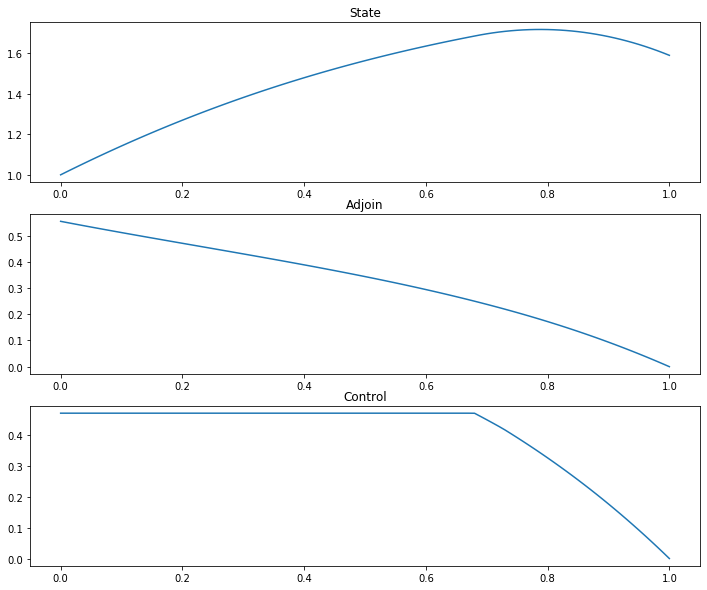

In [21]:
fig = plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.plot(t, x)
plt.title('State')
plt.subplot(3,1,2)
plt.plot(t, adj)
plt.title('Adjoin')
plt.subplot(3,1,3)
plt.plot(t, u)
plt.title('Control')
plt.show()